In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
# Студенты с четным порядковым номером в группе должны использовать набор данных о жилье в Калифорнии Скачать тут

Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).


Сначала погрузим датасет


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/california_housing_train (2).csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


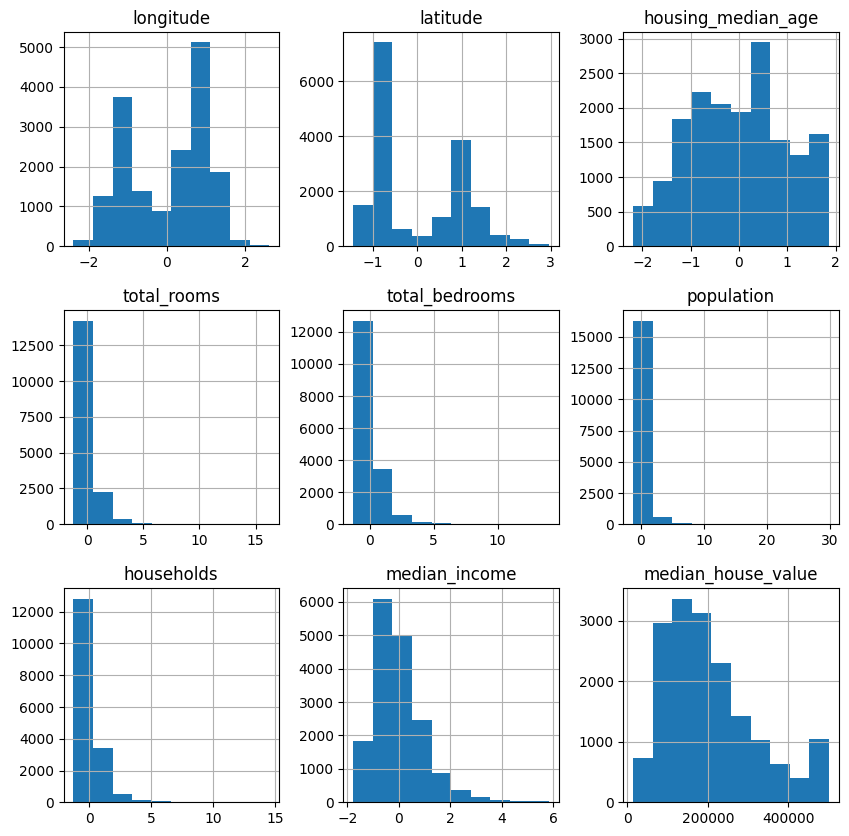

In [ ]:
# Гистограмма
data.hist(figsize=(10, 10))
plt.show()


Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка

Обработка отсутстующих значений

In [ ]:
# 1. Обработка отсутствующих значений
# Предположим, что мы хотим заполнить отсутствующие значения средними значениями для каждого столбца.
data = data.fillna(data.mean())

 Кодирование категориальных признаков - нет, переходим к нормировке

In [ ]:
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

mean_std = {}
for column in numeric_columns:
    mean = data[column].mean()
    std = data[column].std()
    mean_std[column] = (mean, std)


for column in numeric_columns:
    mean, std = mean_std[column]
    data[column] = (data[column] - mean) / std
data



KeyError: ignored

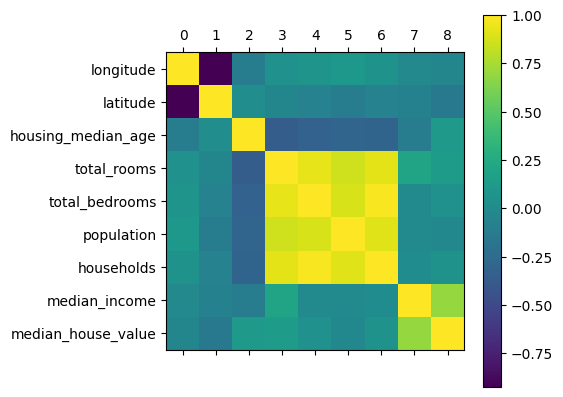

In [ ]:
plt.matshow(data.corr())
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()

0.9809200924180822


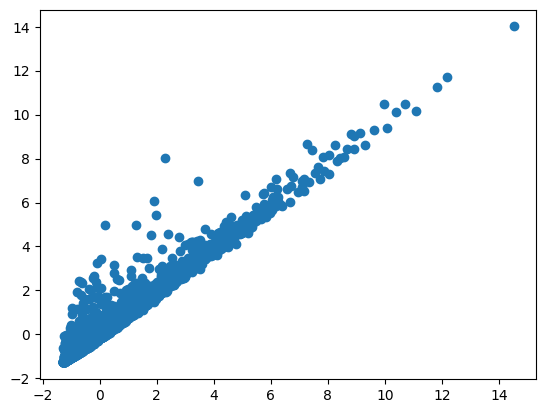

In [ ]:
plt.scatter(data['households'], data['total_bedrooms'])
print(data.corr()['households']['total_bedrooms'])
data.drop('total_bedrooms', axis=1, inplace=True)

Разделите данные на обучающий и тестовый наборы данных.
X - признаки (независимые переменные), y - целевая переменная (зависимая переменная)


X_train - обучающие признаки
X_test - тестовые признаки
y_train - обучающая целевая переменная
y_test - тестовая целевая переменная

In [ ]:
test_size = 0.2
random_state = 42

train = data.sample(frac = test_size, random_state = random_state)
test = data.drop(train.index)
X_train = train.drop('median_house_value', axis = 1)
Y_train = train['median_house_value']
X_test = test.drop('median_house_value', axis = 1)
Y_test = test['median_house_value']



Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.


In [ ]:
def least_squares_method(X, Y):
    X = np.c_[np.ones(X.shape[0]), X]
    coef = np.linalg.inv(X.T @ X) @ X.T @ Y
    return coef

def pred(coef, X):
    X = np.c_[np.ones(X.shape[0]), X]
    return np.dot(X, coef)

def R_2(y_true, y_pred):
    y_mean = np.mean(y_true)
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - y_mean)**2))
    return r2


Теперь модели с различными наборами признаков

In [ ]:
coef = least_squares_method(X_train, Y_train)
Y_pred = pred(coef, X_test)
print("Коэффициент детерминации:", R_2(Y_test, Y_pred))

Коэффициент детерминации: 0.6249787054138835


In [ ]:
coef = least_squares_method(X_train['median_income'], Y_train)
Y_pred = pred(coef, X_test['median_income'])
print("Коэффициент детерминации:", R_2(Y_test, Y_pred))

Коэффициент детерминации: 0.47254437295288754


In [ ]:
coef = least_squares_method(X_train[['median_income', 'total_rooms']], Y_train)
Y_pred = pred(coef, X_test[['median_income', 'total_rooms']])
print("Коэффициент детерминации:", R_2(Y_test, Y_pred))

Коэффициент детерминации: 0.47255823336886826
